<a href="https://colab.research.google.com/github/athar223/Histogram-and-Intensity-Transformations-h1-ed4.ipynb/blob/main/social_media_post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn tensorflow keras


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/social media/training.1600000.processed.noemoticon.csv', encoding='latin1')
print(df.head())


   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving at all....           

In [6]:
# Display dataset shape and first few rows
print(f"Dataset shape: {df.shape}")
print(df.head())

# Check for missing values
print(df.isnull().sum())


Dataset shape: (1599999, 6)
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not be

In [7]:
# Assume the CSV has columns named 'target' for sentiment and 'content' for text
df = pd.read_csv('/content/drive/MyDrive/social media/training.1600000.processed.noemoticon.csv', encoding='latin1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'content'] # Assign column names
print(df.head())

# Keep only the 'target' and 'content' columns
df = df[['target', 'content']]

# Map sentiment values: 0 (negative) -> negative, 4 (positive) -> positive
df['target'] = df['target'].replace({0: 'negative', 4: 'positive'})

# Display dataset after cleanup
print(df.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                            content  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
     target                                            content
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Face

In [8]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text cleaning to the 'content' column and store the result in a new 'text' column
df['text'] = df['content'].apply(clean_text)  # Changed from df['text'] to df['content']
print(df['text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    awww thats bummer shoulda got david carr third...
1    upset cant update facebook texting might cry r...
2    dived many times ball managed save 50 rest go ...
3                     whole body feels itchy like fire
4                             behaving im mad cant see
Name: text, dtype: object


In [9]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df['text']
y = df['target']  # Changed from 'sentiment' to 'target'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (1280000,), Testing set: (320000,)


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to the same length
max_len = 50
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

print(f"Padded training set shape: {X_train_pad.shape}")


Padded training set shape: (1280000, 50)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))  # Use sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
history = model.fit(X_train_pad, y_train.map({'negative': 0, 'positive': 1}),
                    epochs=5, batch_size=32, validation_split=0.2)


Epoch 1/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 1080s 34ms/step - accuracy: 0.7615 - loss: 0.4890 - val_accuracy: 0.7853 - val_loss: 0.4529
Epoch 2/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 1134s 35ms/step - accuracy: 0.7884 - loss: 0.4474 - val_accuracy: 0.7887 - val_loss: 0.4467
Epoch 3/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 1129s 34ms/step - accuracy: 0.7939 - loss: 0.4376 - val_accuracy: 0.7901 - val_loss: 0.4448
Epoch 4/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 1058s 33ms/step - accuracy: 0.7993 - loss: 0.4295 - val_accuracy: 0.7904 - val_loss: 0.4448
Epoch 5/5
32000/32000 ━━━━━━━━━━━━━━━━━━━━ 1111s 35ms/step - accuracy: 0.8015 - loss: 0.4253 - val_accuracy: 0.7908 - val_loss: 0.4444


In [14]:
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test.map({'negative': 0, 'positive': 1}))
print(f"Test Accuracy: {accuracy * 100:.2f}%")


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 116s 12ms/step - accuracy: 0.7905 - loss: 0.4439
Test Accuracy: 79.09%


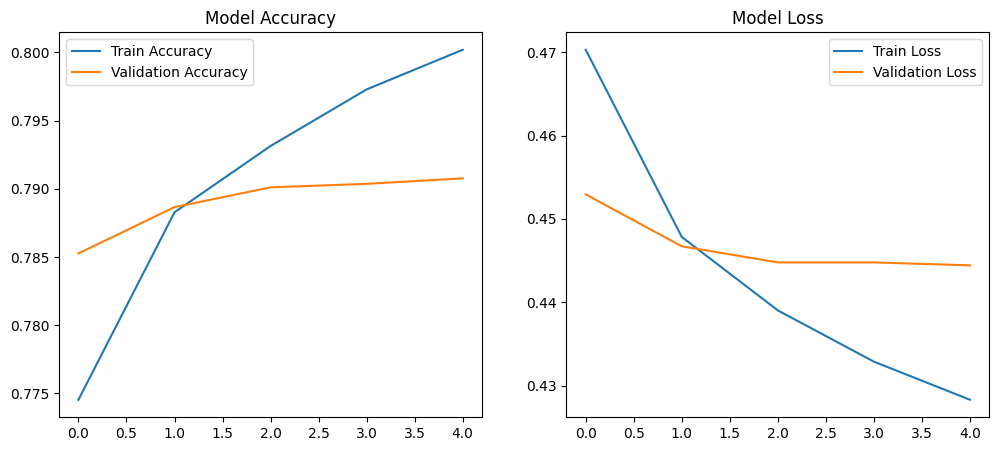

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [16]:
# Save the trained model
model.save('sentiment_model.h5')

# Example prediction
sample_text = ["I love this movie! It's amazing."]
sample_seq = pad_sequences(tokenizer.texts_to_sequences(sample_text), maxlen=max_len)
print(model.predict(sample_seq))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
[[0.9788278]]


In [17]:
model.save('sentiment_model.h5')


In [18]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('sentiment_model.h5')


In [19]:
sample_text = ["I love this movie! It's amazing."]
sample_seq = pad_sequences(tokenizer.texts_to_sequences(sample_text), maxlen=max_len)
print(model.predict(sample_seq))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.9788278]]


In [20]:
sample_texts = ["I love this movie!", "This is the worst product I ever bought.", "Just okay, not great."]
sample_seqs = pad_sequences(tokenizer.texts_to_sequences(sample_texts), maxlen=max_len)
predictions = model.predict(sample_seqs)

# Interpret predictions
for text, pred in zip(sample_texts, predictions):
    sentiment = "positive" if pred > 0.5 else "negative"
    print(f"Text: {text}\nSentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
Text: I love this movie!
Sentiment: positive

Text: This is the worst product I ever bought.
Sentiment: negative

Text: Just okay, not great.
Sentiment: positive



In [21]:
new_texts = ["The customer service was awful.", "Amazing experience at the new restaurant!", "Not sure if I liked it or not."]
new_seqs = pad_sequences(tokenizer.texts_to_sequences(new_texts), maxlen=max_len)
new_predictions = model.predict(new_seqs)

for text, pred in zip(new_texts, new_predictions):
    print(f"Text: {text}\nPrediction: {pred[0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Text: The customer service was awful.
Prediction: 0.04
Text: Amazing experience at the new restaurant!
Prediction: 0.98
Text: Not sure if I liked it or not.
Prediction: 0.87


In [23]:
threshold = 0.6
# Assuming you meant to use the last prediction from 'new_predictions'
prediction = new_predictions[-1]  # Get the last prediction
sentiment = "positive" if prediction[0] > threshold else "negative" # Corrected indexing
print(sentiment) # Print the result

positive
